# Project Objective
Investigate whether there is any measurable difference in progress based on the eligibility category. There are three options:
*Preliminary Analysis*
+ Developmental evaluation (delay)
+ Diagnosed condition
+ Diagnosed condition, developmental evaluation (by both delay and diagnosis)
1. Start by looking at overall progress by eligibility category (column AI of the "Elig Timeline Rpt 2018-2022" tab)
2. Factor in the time of service ("ECO with Exit-21-22" tab)
3. Do the above comparison by POE as well (column A of the "ECO with Exit21-22")
*Additional Analysis*
Additional areas you can look into are listed below:
+ Does typical time of service differ for different eligibility categories?
+ Do exit reasons vary by eligibility category? Do more children in one eligibility category age out compared to leaving for other reasons?
+ "ECO with Exit21-22" contains the entry ECO scores (columns D, E, and F) and exit scores (columns H, I, and J) Analyze these scores by looking at the typical improvement seen for each entry rating compared to the time of service. What percentage of children entering with a score of 1 also exit with a score of 1? How many improve to a 2 or a 3? How does this vary by time of service?

<b> Part 2 <b>
    
Does typical time of service differ for different eligibility categories?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%matplotlib inline

<b> eco21_22_exit - has negative numbers in days btw IFSP to Exit Eco <b>

In [3]:
eco_21_22_exit = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name="ECO with Exit21-22", nrows=8632)
eco_21_22_exit

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,NaN,1.0,NaN,NaN,NaN,1,206,183,0
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,704,514,0
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,115,-44483,-44483
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,NaN,NaN,1.0,NaN,NaN,1,1053,1026,0
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,159,-44434,-44434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,361,176,0
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,353,353,0
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,130,-44574,-44574
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,495,351,0


In [4]:
eco_21_22_exit.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,NaN,1.0,NaN,NaN,NaN,1,206,183,0
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,704,514,0
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,115,-44483,-44483
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,NaN,NaN,1.0,NaN,NaN,1,1053,1026,0
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,159,-44434,-44434


In [5]:
eco_21_22_exit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8632 entries, 0 to 8631
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DISTRICT                              8632 non-null   object        
 1   CHILD_ID                              8632 non-null   int64         
 2   ECO_Entry_DATE                        5721 non-null   datetime64[ns]
 3   Ent SOCIAL_SCALE                      5721 non-null   float64       
 4   Ent KNOWLEDGE_SCALE                   5721 non-null   float64       
 5   Ent APPROPRIATE_ACTION_SCALE          5721 non-null   float64       
 6   ECO_Exit_DATE                         5721 non-null   datetime64[ns]
 7   Exit SOCIAL_SCALE                     5721 non-null   float64       
 8   Exit KNOWLEDGE_SCALE                  5721 non-null   float64       
 9   Exit APPROPRIATE_ACTION_SCALE         5721 non-null   float64       
 10  

In [6]:
eco_21_22_exit.rename(columns = {'CHILD_ID':'Child ID'}, inplace = True)
eco_21_22_exit

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,NaN,1.0,NaN,NaN,NaN,1,206,183,0
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,704,514,0
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,115,-44483,-44483
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,NaN,NaN,1.0,NaN,NaN,1,1053,1026,0
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,159,-44434,-44434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,361,176,0
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,353,353,0
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,130,-44574,-44574
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,495,351,0


<b> eco_21_22_data <b>

In [7]:
eco_21_22_data = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name="Elig Timeline Rpt 2018-2022")
eco_21_22_data

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline


In [8]:
eco_21_22_data = pd.read_excel("../Data/TEIS-NSS Project Data 10-2022.xlsx", sheet_name="Elig Timeline Rpt 2018-2022")
eco_21_22_data.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [9]:
eco_21_22_data.rename(columns = {'Init. Elig. Category': 'Init_Elig_Cat'}, inplace=True)
eco_21_22_data

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init_Elig_Cat,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline


In [10]:
eco_21_22_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

<b> Making new dataframes for eco_21_22_data and eco_21_22_exit<b>
    

In [11]:
df2_data = eco_21_22_data[['Child ID','Init_Elig_Cat']]
df2_data

,Child ID,Init_Elig_Cat
0,453926,Developmental Evaluation
1,431729,"Diagnosed Condition, Developmental Evaluation"
2,462474,Developmental Evaluation
3,446841,Diagnosed Condition
4,459629,Developmental Evaluation
...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation"
67606,509684,Developmental Evaluation
67607,526338,Developmental Evaluation
67608,511641,Diagnosed Condition


In [13]:
df1_exit = eco_21_22_exit[['Child ID','Days btw Initial and Exit', 'Days btw I-IFSP to Exit ECO','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE','Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE']].dropna()
df1_exit

,Child ID,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,500335,206,183,5.0,3.0,4.0,6.0,3.0,4.0
1,479453,704,514,7.0,7.0,7.0,7.0,7.0,7.0
3,452482,1053,1026,2.0,3.0,3.0,5.0,3.0,5.0
5,494216,288,175,2.0,4.0,6.0,4.0,5.0,7.0
6,449725,444,348,4.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...
8624,490337,445,184,3.0,1.0,1.0,3.0,3.0,1.0
8626,483729,416,352,1.0,3.0,2.0,6.0,6.0,6.0
8627,485978,361,176,1.0,3.0,5.0,5.0,7.0,7.0
8628,488802,353,353,4.0,4.0,3.0,6.0,7.0,7.0


In [ ]:
df1_exit.tail()

1. need to filter df2 to pull 2021,2022 data
2. merge df1 and df2 on child id 
3. can start looking at performance progress (average performance progress grouped by district, elegibality)


In [ ]:
df1_exit = df1_exit.astype({'Child ID':'int','DISTRICT':'str','<Calc> Months in Program':'int','Ent SOCIAL_SCALE':'int','Ent KNOWLEDGE_SCALE':'int', 'Ent APPROPRIATE_ACTION_SCALE':'int', 'Exit SOCIAL_SCALE':'int','Exit KNOWLEDGE_SCALE':'int','Exit APPROPRIATE_ACTION_SCALE':'int'})
df1_exit

In [ ]:
df1_exit.info()

In [ ]:
df2_dd = df2_data.loc[df2_data.Init_Elig_Cat == 'Developmental Evaluation', :]
df2_dd

<b> Merging the two new dataframes I made that only have the Cat= Developmental Evaluation and then has the progrerss in the other<b>
    
    new dataframe is df_merge

In [ ]:
df_merge = df2_dd.merge(df1_exit, on='Child ID')
df_merge

In [ ]:
print("The mean of column 'Months in Program' is for Developmental Evaluation :")
print(df_merge['<Calc> Months in Program'].mean())

In [ ]:
print(df_merge['Ent SOCIAL_SCALE'].sum())

In [ ]:
print(df_merge['Exit SOCIAL_SCALE'].sum())


In [ ]:
20247-14449

### Starting from the top

In [15]:
df2_data = eco_21_22_data[['Child ID','Init_Elig_Cat']]
df2_data

,Child ID,Init_Elig_Cat
0,453926,Developmental Evaluation
1,431729,"Diagnosed Condition, Developmental Evaluation"
2,462474,Developmental Evaluation
3,446841,Diagnosed Condition
4,459629,Developmental Evaluation
...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation"
67606,509684,Developmental Evaluation
67607,526338,Developmental Evaluation
67608,511641,Diagnosed Condition


In [14]:
df1_exit = eco_21_22_exit[['Child ID','Days btw Initial and Exit', 'Days btw I-IFSP to Exit ECO','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE','Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE']].dropna()
df1_exit

,Child ID,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,500335,206,183,5.0,3.0,4.0,6.0,3.0,4.0
1,479453,704,514,7.0,7.0,7.0,7.0,7.0,7.0
3,452482,1053,1026,2.0,3.0,3.0,5.0,3.0,5.0
5,494216,288,175,2.0,4.0,6.0,4.0,5.0,7.0
6,449725,444,348,4.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...
8624,490337,445,184,3.0,1.0,1.0,3.0,3.0,1.0
8626,483729,416,352,1.0,3.0,2.0,6.0,6.0,6.0
8627,485978,361,176,1.0,3.0,5.0,5.0,7.0,7.0
8628,488802,353,353,4.0,4.0,3.0,6.0,7.0,7.0


In [20]:
df1_exit = df1_exit.loc[(df1_exit['Days btw Initial and Exit']>=183)]
df1_exit = df1_exit.loc[(df1_exit['Days btw I-IFSP to Exit ECO']>0)]

In [21]:
df1_exit

,Child ID,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,500335,206,183,5.0,3.0,4.0,6.0,3.0,4.0
1,479453,704,514,7.0,7.0,7.0,7.0,7.0,7.0
3,452482,1053,1026,2.0,3.0,3.0,5.0,3.0,5.0
5,494216,288,175,2.0,4.0,6.0,4.0,5.0,7.0
6,449725,444,348,4.0,5.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...
8624,490337,445,184,3.0,1.0,1.0,3.0,3.0,1.0
8626,483729,416,352,1.0,3.0,2.0,6.0,6.0,6.0
8627,485978,361,176,1.0,3.0,5.0,5.0,7.0,7.0
8628,488802,353,353,4.0,4.0,3.0,6.0,7.0,7.0


In [24]:
df_merge1 = df2_data.merge(df1_exit, on = 'Child ID')
df_merge1

,Child ID,Init_Elig_Cat,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE
0,446765,Developmental Evaluation,842,728,3.0,6.0,3.0,6.0,3.0,5.0
1,450627,Developmental Evaluation,980,924,1.0,2.0,1.0,7.0,6.0,7.0
2,444509,Developmental Evaluation,1025,931,2.0,4.0,4.0,7.0,7.0,7.0
3,459059,Diagnosed Condition,1060,784,3.0,3.0,2.0,3.0,3.0,7.0
4,452507,Diagnosed Condition,815,721,2.0,5.0,1.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...
5580,508426,Developmental Evaluation,247,174,1.0,1.0,3.0,2.0,2.0,4.0
5581,508761,Developmental Evaluation,284,153,1.0,2.0,6.0,5.0,3.0,6.0
5582,506474,"Diagnosed Condition, Developmental Evaluation",259,177,3.0,5.0,1.0,3.0,4.0,1.0
5583,509584,Developmental Evaluation,248,176,1.0,1.0,1.0,1.0,1.0,2.0


In [38]:
df1_merge_group = df_merge1.groupby('Init_Elig_Cat', as_index=False)['Days btw Initial and Exit','Days btw I-IFSP to Exit ECO'].mean()

C:\Users\sarah\AppData\Local\Temp\ipykernel_28556\1107035966.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_merge_group = df_merge1.groupby('Init_Elig_Cat', as_index=False)['Days btw Initial and Exit','Days btw I-IFSP to Exit ECO'].mean()


In [40]:
df1_merge_group

,Init_Elig_Cat,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO
0,Developmental Evaluation,453.665929,339.618696
1,Diagnosed Condition,687.132132,559.340841
2,"Diagnosed Condition, Developmental Evaluation",623.359906,499.064478


In [29]:
453/30


15.1

In [30]:
339/30

11.3

In [31]:
687/30

22.9

In [32]:
559/30

18.633333333333333

In [33]:
623/30

20.766666666666666

In [34]:
499/30

16.633333333333333

In [42]:
df1_merge_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Init_Elig_Cat                3 non-null      object 
 1   Days btw Initial and Exit    3 non-null      float64
 2   Days btw I-IFSP to Exit ECO  3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


In [45]:
df1_merge_group['Avg Months btw I and E'] = df1_merge_group['Days btw Initial and Exit']/30
df1_merge_group

,Init_Elig_Cat,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Avg Months btw I and E
0,Developmental Evaluation,453.665929,339.618696,15.122198
1,Diagnosed Condition,687.132132,559.340841,22.904404
2,"Diagnosed Condition, Developmental Evaluation",623.359906,499.064478,20.778664


In [47]:
df1_merge_group['Avg Months btw I-IFSP and E ECO'] = df1_merge_group['Days btw I-IFSP to Exit ECO']/30
df1_merge_group.round()

,Init_Elig_Cat,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Avg Months btw I and E,Avg Months btw I-IFSP and E ECO
0,Developmental Evaluation,454.0,340.0,15.0,11.0
1,Diagnosed Condition,687.0,559.0,23.0,19.0
2,"Diagnosed Condition, Developmental Evaluation",623.0,499.0,21.0,17.0


In [54]:
df1_merge_group_re = df1_merge_group.reindex(columns= ['Init_Elig_Cat', 'Days btw Initial and Exit', 'Avg Months btw I and E', 'Days btw I-IFSP to Exit ECO', 'Avg Months btw I-IFSP and E ECO'])
df1_merge_group_re.round()

,Init_Elig_Cat,Days btw Initial and Exit,Avg Months btw I and E,Days btw I-IFSP to Exit ECO,Avg Months btw I-IFSP and E ECO
0,Developmental Evaluation,454.0,15.0,340.0,11.0
1,Diagnosed Condition,687.0,23.0,559.0,19.0
2,"Diagnosed Condition, Developmental Evaluation",623.0,21.0,499.0,17.0


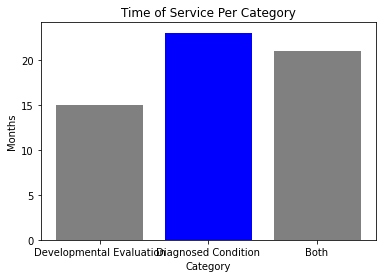

In [68]:
Init_Elig_Cat = ['Developmental Evaluation', 'Diagnosed Condition', 'Both']
Months = [15,23,21]
colors = ['grey', 'blue', 'grey']


plt.bar(Init_Elig_Cat, Months, color = colors)
plt.title('Time of Service Per Category')
plt.xlabel('Category')
plt.ylabel('Months')
plt.show();



In [69]:
#let's plot this as a seaborn and have them combined together (days btw initial and days btw i-ifsp) 

In [70]:
#maybe look at doing a line chart.. figma one or whatever it's called 